- 여러분이 선호하는 데이터셋을 선정해주세요
- 이 데이터셋에 대한 여러 가설을 세워주세요.
- 가설을 증명하기 위한 여러 데이터 분석 / 시각화를 진행해주세요.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_info_rows', None)

# col 생략 없이 출력
pd.set_option('display.max_columns', None)
%matplotlib inline

### House Price
- `https://www.kaggle.com/c/house-prices-advanced-regression-techniques`

### 가설

- 집값은 위치, 주택크기, 외내부마감재, 대지면적에 영향을 받을 것이다.
- 주택크기와 대지면적을 별도로 하는 이유는 해당자료가 아파트가 많은 대한민국이 아닌 미국 주택에 대한 자료이기 때문이다.
- 각 항목에 대해 집값에 주는 영향을 알아보자

In [85]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 각 Column에 대해 정보를 파악
- numerical? categorical?
- 각 Column이 미칠 영향에 대한 기대
- 궁극적인 목표 : **주택가격 예측**

### SalePrice : 주택 가격(목표)

In [87]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- min 값이 34900 으로 0보다 크므로 결측치에 대한 처리 불필요

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

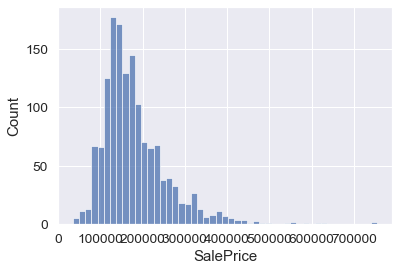

In [88]:
sns.histplot(df['SalePrice'])

In [89]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [90]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


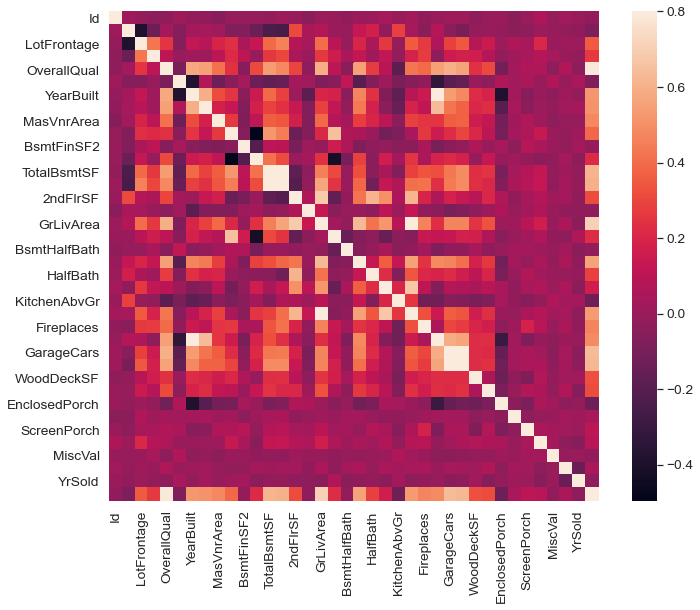

In [91]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);

In [92]:
df.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

### numerical value를 갖는 column 중 영향력이 큰 것에 대해 알아보기

- OverallQual      0.790982 전체적인 자재, 마감 품질
- YearBuilt        0.522897 초기 건설 날짜
- TotalBsmtSF      0.613581 지하 총 면적
- 1stFlrSF         0.605852 1층 면적
- GrLivArea        0.708624 지상 주거지 면적
- FullBath         0.560664 지상 full bath 수
- TotRmsAbvGrd     0.533723 bath 제외 방 수
- GarageCars       0.640409 보관 가능 차량 수
- GarageArea       0.623431 차고 면적

다행이도 분석할 항목에 대해 결측치가 없다

### 1. 주택 크기

- 위 항목중 'GrLivArea'는 주택 크기를 나타내는 항목이다

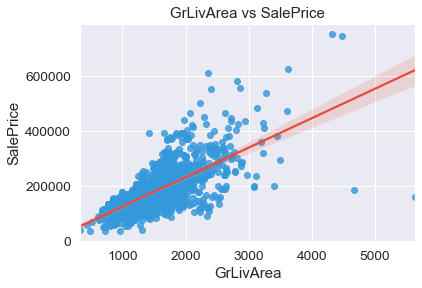

In [93]:
g = sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('GrLivArea vs SalePrice')
plt.show()

- 데이터상에서 주택의 크기가 클수록 집값도 오름을 알 수 있다.
- 이외 대지면적을 제외한 총 면적에 대해 주택 크기에 주는 영향을 알아보자

In [94]:
df['totalArea']=df['GrLivArea']+df['TotalBsmtSF']+df['GarageArea']+df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['PoolArea']

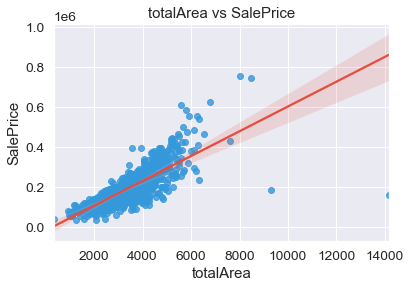

In [95]:
g = sns.regplot(x='totalArea', y='SalePrice', data=df, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('totalArea vs SalePrice')
plt.show()

- 대지면적을 제외한 주거지, 지하, 차고, wooddeck, 현관, 뒷문, 수영장의 총 면적이 집값에 많은 영향을 미침을 알 수 있다.

### 2. 마감재 품질

- 위 항목 중 'OverallQual'이 전체적인 마감재의 품질을 나타낸다.

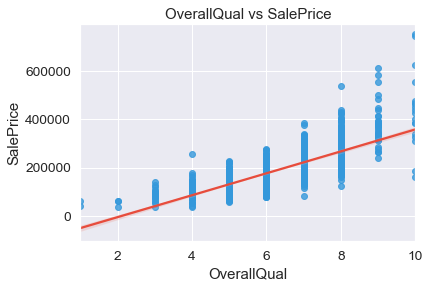

In [96]:
g = sns.regplot(x='OverallQual', y='SalePrice', data=df, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('OverallQual vs SalePrice')
plt.show()

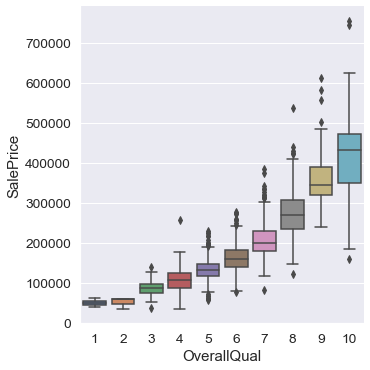

In [97]:
g = sns.catplot(x='OverallQual', y='SalePrice', data=df, kind='box')

- 데이터상에서 마감재 품질이 좋을 수록 집값이 오름을 알 수 있다

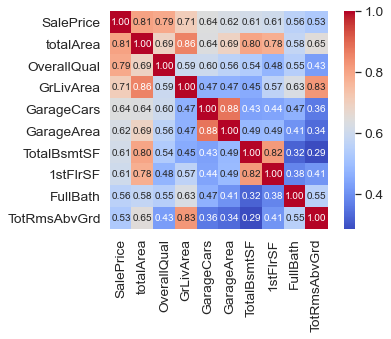

In [98]:
k = 10 
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap = "coolwarm")
plt.show()

In [99]:
df[cols].isnull().sum()

SalePrice       0
totalArea       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

- corr이 높게 나온 다른 항목을 보면 차고지 크기, 지하 크기, 1층 크기, 욕실 수, 방의 수와 같이 주택 크기에 영향을 주는 항목임을 알 수 있다.
- 또한 해당 항목들이 마감재 품질, 주택크기와 높은 상관관계를 갖음을 알 수 있다.

### 3. 대지면적

- SalePrice와 높은 상관관계를 나타내는 항목에는 없지만 'LotArea'가 대지면적을 나타낸다

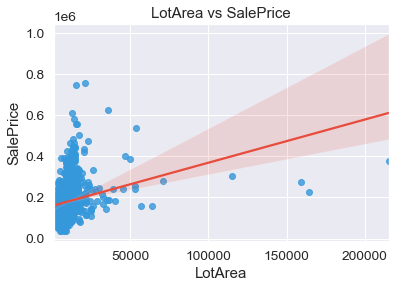

In [101]:
g = sns.regplot(x='LotArea', y='SalePrice', data=df, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('LotArea vs SalePrice')
plt.show()

In [102]:
dropOutlier=df.drop(df[df['LotArea']>50000].index)

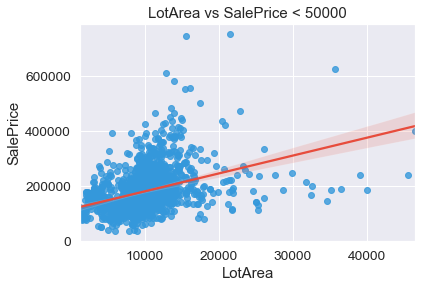

In [103]:
g = sns.regplot(x='LotArea', y='SalePrice', data=dropOutlier, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('LotArea vs SalePrice < 50000')
plt.show()

In [104]:
dropOutlier=df.drop(df[df['LotArea']>20000].index)

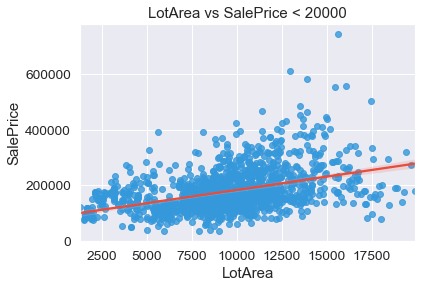

In [105]:
g = sns.regplot(x='LotArea', y='SalePrice', data=dropOutlier, scatter_kws={'color':'#3498db'}, line_kws={'color':'#e74c3c'})
g.set_title('LotArea vs SalePrice < 20000')
plt.show()

- 데이터가 20000이하의 대지 면적을 갖는 주택의 비율이 대부분이라 해당부분으로 잘라서 보았다.
- 대지의 면적이 주택가격에 어느정도는 영향을 미칠 수 있지만 해당 데이터에서는 대지면적보다는 실제로 사람이 사는 주택의 크기, 마감재가 가격에 더 큰 영향을 미침을 알 수 있다.

### 4. 위치

- 해당 자료는 한 지역에서 추츨한 자료라서 위치를 나타내는 항목이 도로 접근 유형을 나타내는 Street 항목만 있다. 해당 값은 Grvl: 비포장, Pave:포장으로 나뉜다.

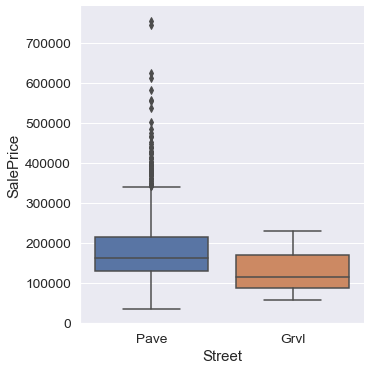

In [106]:
sns.catplot(x='Street', y='SalePrice', kind='box', data=df)
plt.show()

- 어찌보면 당연하지만 포장도로로 도로에 접근하는 집이 비포장도로로 도로에 접근하는 집보다 다소 비싼편임을 알 수 있다.

### 결론

- 사전에 예측한대로 집값에는 주택의 크기, 마감재 품질, 대지 크기, 위치?가 영향을 미침을 알 수 있다.
- 특히 주택의 크기와 마감재품질이 이 두개만으로 어느정도 예측이 가능할 정도로 집값에 매우 큰 영향을 미침을 알 수 있다.
- 허나 해당 데이터가 한 지역을 기준으로 작성한 데이터이기에 상식적으로 집값의 경우 지역의 영향을 많이 받기에 더 넓은 범위의 집값 예측을 위해서는 지역 정보를 포함한 데이터를 활용해야하거나 이 데이터처럼 예측할 지역을 정해야한다.